In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn, Tensor
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision.transforms as transforms
from torchmetrics.image.fid import FrechetInceptionDistance

In [2]:
from torchvision import datasets, transforms
import torch

batch_size=64

digit = 8  # chiffre sur lequel tu veux entraîner
transform = transforms.Compose([transforms.ToTensor()])

mnist_full = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
indices = [i for i, label in enumerate(mnist_full.targets) if label == digit]
mnist_digit = torch.utils.data.Subset(mnist_full, indices)

train_loader = torch.utils.data.DataLoader(mnist_digit, batch_size, shuffle=True)


In [3]:
len(indices)

5851

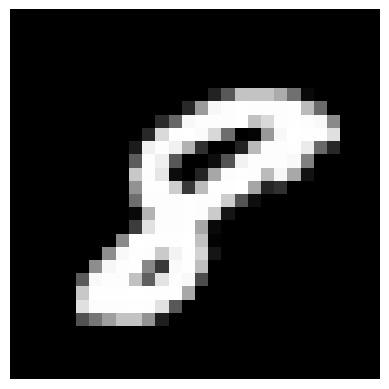

In [4]:
img, label = mnist_digit[80]  # décompose le tuple
plt.imshow(img.squeeze(), cmap="gray")
plt.axis('off')
plt.show()

In [5]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


### Basic CNN

In [6]:
import CNN1 as CNN1
model = CNN1.CNN1()


In [7]:
n_epochs = 10000

optim = torch.optim.Adam(model.parameters(), lr=0.0001) 
scheduler = ReduceLROnPlateau(optim, mode='min', factor=0.5, patience=50, verbose=True)
model = model.to(device)

for epoch in range(n_epochs):

    x_1, _ = next(iter(train_loader)) 
    x_1 = x_1.to(device).to(torch.float32)

    x_0 = torch.randn_like(x_1).to(device)

    t = torch.rand(batch_size, 1).to(device)

    x_t = (1 - t.view(-1, 1, 1, 1)) * x_0 + t.view(-1, 1, 1, 1) * x_1

    v_true = x_1 - x_0  

    v_pred = model(x_t, t)

    loss = ((v_pred - v_true) ** 2).mean()

    optim.zero_grad()
    loss.backward()
    optim.step()

    if epoch % 100 == 0:
        print(f"epoch {epoch} | loss = {loss.item():.4f}")

/opt/campux/virtualenv/deeplearning-u24/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


epoch 0 | loss = 1.1284
epoch 100 | loss = 0.4296
epoch 200 | loss = 0.3724
epoch 300 | loss = 0.3051
epoch 400 | loss = 0.2689
epoch 500 | loss = 0.2958
epoch 600 | loss = 0.2644
epoch 700 | loss = 0.2225
epoch 800 | loss = 0.2381
epoch 900 | loss = 0.2338
epoch 1000 | loss = 0.2366
epoch 1100 | loss = 0.2569
epoch 1200 | loss = 0.2072
epoch 1300 | loss = 0.2086
epoch 1400 | loss = 0.2157
epoch 1500 | loss = 0.1746
epoch 1600 | loss = 0.1871
epoch 1700 | loss = 0.2173
epoch 1800 | loss = 0.1796
epoch 1900 | loss = 0.1762
epoch 2000 | loss = 0.2056
epoch 2100 | loss = 0.1865
epoch 2200 | loss = 0.1766
epoch 2300 | loss = 0.1814
epoch 2400 | loss = 0.1816
epoch 2500 | loss = 0.1880
epoch 2600 | loss = 0.1725
epoch 2700 | loss = 0.1841
epoch 2800 | loss = 0.1890
epoch 2900 | loss = 0.1750
epoch 3000 | loss = 0.1555
epoch 3100 | loss = 0.1502
epoch 3200 | loss = 0.1626
epoch 3300 | loss = 0.1720
epoch 3400 | loss = 0.1960
epoch 3500 | loss = 0.1614
epoch 3600 | loss = 0.1609
epoch 3700 | 

In [95]:
import torch

def generate_image(model, steps=100, device="cuda"):

    x_t = torch.randn(1, 1, 28, 28, device=device)

    dt = 1.0 / steps
    
    for step in range(steps):
        t = torch.tensor([[1.0 - step*dt]], device=device)  # t décroissant de 1 à 0
        v = model(x_t, t)
        x_t = x_t + dt * v  
    
    x_gen = torch.clip(x_t, 0.0, 1.0)
    return x_gen


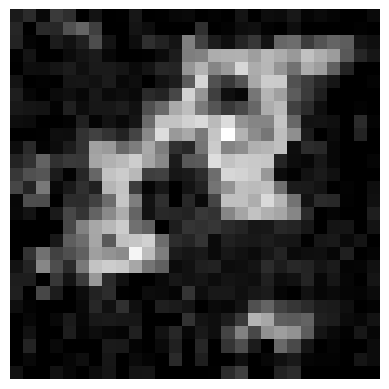

In [9]:
model = model.to(device)
x_gen = generate_image(model)
import matplotlib.pyplot as plt
plt.imshow(x_gen[0,0].cpu().detach(), cmap="gray")
plt.axis("off")
plt.show()

### Basic UNET

In [111]:
import UNET as UNET


model2 = UNET.UNet4()

In [113]:
n_epochs = 5000
model2 = model2.to(device)

optim = torch.optim.Adam(model2.parameters(), lr=0.0001) 
scheduler = ReduceLROnPlateau(optim, mode='min', factor=0.5, patience=50, verbose=True)


for epoch in range(n_epochs):

    x_1, _ = next(iter(train_loader)) 
    x_1 = x_1.to(device).to(torch.float32)

    x_0 = torch.randn_like(x_1).to(device)

    t = torch.rand(batch_size, 1).to(device)

    x_t = (1 - t.view(-1, 1, 1, 1)) * x_0 + t.view(-1, 1, 1, 1) * x_1

    v_true = x_1 - x_0  

    v_pred = model2(x_t, t)

    loss = ((v_pred - v_true) ** 2).mean()

    optim.zero_grad()
    loss.backward()
    optim.step()

    if epoch % 200 == 0:
        print(f"epoch {epoch} | loss = {loss.item():.4f}")

/opt/campux/virtualenv/deeplearning-u24/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


epoch 0 | loss = 1.1154
epoch 200 | loss = 0.3712
epoch 400 | loss = 0.3012
epoch 600 | loss = 0.2701
epoch 800 | loss = 0.2088
epoch 1000 | loss = 0.2544
epoch 1200 | loss = 0.2372
epoch 1400 | loss = 0.2026
epoch 1600 | loss = 0.2206
epoch 1800 | loss = 0.2059
epoch 2000 | loss = 0.1850
epoch 2200 | loss = 0.1983
epoch 2400 | loss = 0.1537
epoch 2600 | loss = 0.1366
epoch 2800 | loss = 0.2023
epoch 3000 | loss = 0.1689
epoch 3200 | loss = 0.1626
epoch 3400 | loss = 0.1637
epoch 3600 | loss = 0.1828
epoch 3800 | loss = 0.1934
epoch 4000 | loss = 0.1382
epoch 4200 | loss = 0.1378
epoch 4400 | loss = 0.1689
epoch 4600 | loss = 0.1549
epoch 4800 | loss = 0.1449


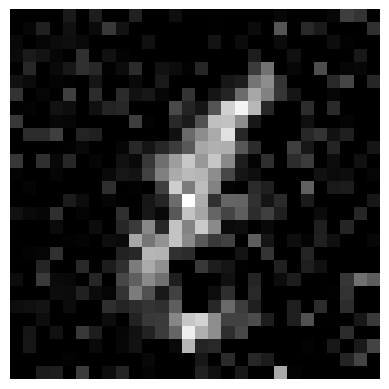

In [159]:
x_gen = generate_image(model2)
import matplotlib.pyplot as plt
plt.imshow(x_gen[0,0].cpu().detach(), cmap="gray")
plt.axis("off")
plt.show()

In [162]:
fid.reset()
x_prepared = to_uint8(x_gen).to(fid.device)
fid.update(img_prepared, real=True)
fid.update(x_prepared, real=False)
fid.compute()

RuntimeError: More than one sample is required for both the real and fake distributed to compute FID

### UNET ChatGPT

In [91]:
import UNET_ChatGPT as UNET2


model3 = UNET2.UNetEnhanced()

In [92]:
n_epochs = 2000
model3 = model3.to(device)

optim = torch.optim.Adam(model3.parameters(), lr=0.001) 

for epoch in range(n_epochs):

    x_1, _ = next(iter(train_loader)) 
    x_1 = x_1.to(device).to(torch.float32)

    x_0 = torch.randn_like(x_1).to(device)

    t = torch.rand(batch_size, 1).to(device)

    x_t = (1 - t.view(-1, 1, 1, 1)) * x_0 + t.view(-1, 1, 1, 1) * x_1

    v_true = x_1 - x_0  

    v_pred = model3(x_t, t)

    loss = ((v_pred - v_true) ** 2).mean()

    optim.zero_grad()
    loss.backward()
    optim.step()

    if epoch % 100 == 0:
        print(f"epoch {epoch} | loss = {loss.item():.4f}")

epoch 0 | loss = 1.1206
epoch 100 | loss = 0.1375
epoch 200 | loss = 0.1267
epoch 300 | loss = 0.1279
epoch 400 | loss = 0.1152
epoch 500 | loss = 0.1060
epoch 600 | loss = 0.1097
epoch 700 | loss = 0.1235
epoch 800 | loss = 0.1283
epoch 900 | loss = 0.1048
epoch 1000 | loss = 0.1065
epoch 1100 | loss = 0.1058
epoch 1200 | loss = 0.0994
epoch 1300 | loss = 0.0948
epoch 1400 | loss = 0.1117
epoch 1500 | loss = 0.1023
epoch 1600 | loss = 0.1076
epoch 1700 | loss = 0.0977
epoch 1800 | loss = 0.0980
epoch 1900 | loss = 0.1072


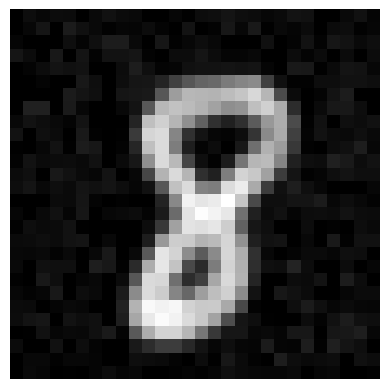

In [109]:
x_gen = generate_image(model3)
import matplotlib.pyplot as plt
plt.imshow(x_gen[0,0].cpu().detach(), cmap="gray")
plt.axis("off")
plt.show()

In [110]:
x_prepared = to_uint8(x_gen).to(fid.device)
fid.update(img_prepared, reax_prepared = prepare_for_fid(x_gen_OAI).to(fid.device)
fid.update(x_prepared, real=True)
fid.compute()l=True)
fid.update(x_prepared, real=False)
fid.compute()

tensor(0.7618)

### Unet OPENAI

In [41]:
import unet as UNET_OAI

model4 = UNET_OAI.UNetModel(
    image_size=28,                
    in_channels=1,                # RGB
    model_channels=96,           # largeur du UNet
    out_channels=1,               # reconstruit 3 canaux
    num_res_blocks=2,             # 1 ou 2, 2 donne + de qualité
    attention_resolutions=[8],   # attention à 16x16
    channel_mult=[1, 2],    
    dropout=0.1,                  # léger dropout
    use_checkpoint=True,         # mettre True si GPU faible
)

In [42]:
from nn import timestep_embedding

n_epochs = 1000
model4 = model4.to(device)
optim = torch.optim.Adam(model4.parameters(), 0.001)

for epoch in range(n_epochs):

    x_1, _ = next(iter(train_loader))
    x_1 = x_1.to(device).float()

    x_0 = torch.randn_like(x_1)

    B = x_1.size(0)

    t = torch.rand(B, device=device)

    # --- Interpolation ---
    x_t = (1 - t.view(B,1,1,1)) * x_0 + t.view(B,1,1,1) * x_1

    # --- Champ de vecteur "réel" ---
    v_true = x_1 - x_0

    # --- Embedding temporel (OBLIGATOIRE pour UNet OpenAI) ---
    v_pred = model4(x_t, t * 1000)


    # --- Loss Flow Matching ---
    loss = ((v_pred - v_true) ** 2).mean()

    # --- Optimisation ---
    optim.zero_grad()
    loss.backward()
    optim.step()

    if(epoch%50 == 0):
        print(f"[epoch {epoch}] loss = {loss.item():.4f}")


[epoch 0] loss = 1.1425
[epoch 50] loss = 0.1723
[epoch 100] loss = 0.1308
[epoch 150] loss = 0.1388
[epoch 200] loss = 0.1359
[epoch 250] loss = 0.1191
[epoch 300] loss = 0.1208
[epoch 350] loss = 0.1242
[epoch 400] loss = 0.1064
[epoch 450] loss = 0.1102
[epoch 500] loss = 0.1081
[epoch 550] loss = 0.0980
[epoch 600] loss = 0.1099
[epoch 650] loss = 0.1072
[epoch 700] loss = 0.1165
[epoch 750] loss = 0.1029
[epoch 800] loss = 0.0985
[epoch 850] loss = 0.0908
[epoch 900] loss = 0.0958
[epoch 950] loss = 0.0940


In [43]:
import torch

def generate_image2(model, steps=100, device="cuda"):
    
    x_t = torch.randn(1, 1, 28, 28, device=device)
    dt = 1.0 / steps
    
    for step in range(steps):
        t_float = step * dt
        # convertir en entier pour l'embedding timestep
        if step == 0:
            print(t_float)
        t_int = torch.tensor([int(t_float * 1000)], device=device)
        v = model(x_t, t_int)
        x_t = x_t + dt * v  

    x_gen = torch.clamp(x_t, 0.0, 1.0)
    img = x_gen[0].permute(1, 2, 0).cpu().detach().numpy()
    
    return x_gen
    



0.0


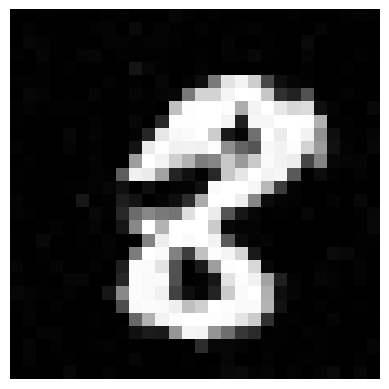

In [83]:
x_gen_OAI = generate_image2(model4)
import matplotlib.pyplot as plt
plt.imshow(x_gen_OAI[0,0].cpu().detach(), cmap="gray")
plt.axis("off")
plt.show()

In [84]:
fid = FrechetInceptionDistance(feature=64)

In [88]:
import torch.nn.functional as F
def to_uint8(img):
    img = (img * 255).clamp(0, 255).to(torch.uint8)
    img = img.repeat(1, 3, 1, 1)
    img = F.interpolate(
        img.float(), size=(299, 299), mode='bilinear', align_corners=False
    ).to(torch.uint8)
    return img



In [89]:
img, label = mnist_digit[80]
img_prepared = to_uint8(img).to(fid.device)

In [90]:
x_prepared = to_uint8(x_gen_OAI).to(fid.device)
fid.update(img_prepared, real=True)
fid.update(x_prepared, real=False)
fid.compute()

tensor(0.3272)